In [98]:
import pandas as pd
import matplotlib.pyplot as plt

Reading and processing data:

In [99]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('train.csv')

# Convert 'Total Assets' and 'Liabilities' columns to integers
df['Total Assets'] = df['Total Assets'].str.replace(r' Crore\+', '0000000', regex=True).str.replace(r' Lac\+', '00000', regex=True).str.replace(r' Thou\+', '000', regex=True).str.replace(r' Hund\+', '00', regex=True).astype(int)
df['Liabilities'] = df['Liabilities'].str.replace(r' Crore\+', '0000000', regex=True).str.replace(r' Lac\+', '00000', regex=True).str.replace(r' Thou\+', '000', regex=True).str.replace(r' Hund\+', '00', regex=True).astype(int)

Plotting the percentage distribution of parties with candidates having the most criminal records:

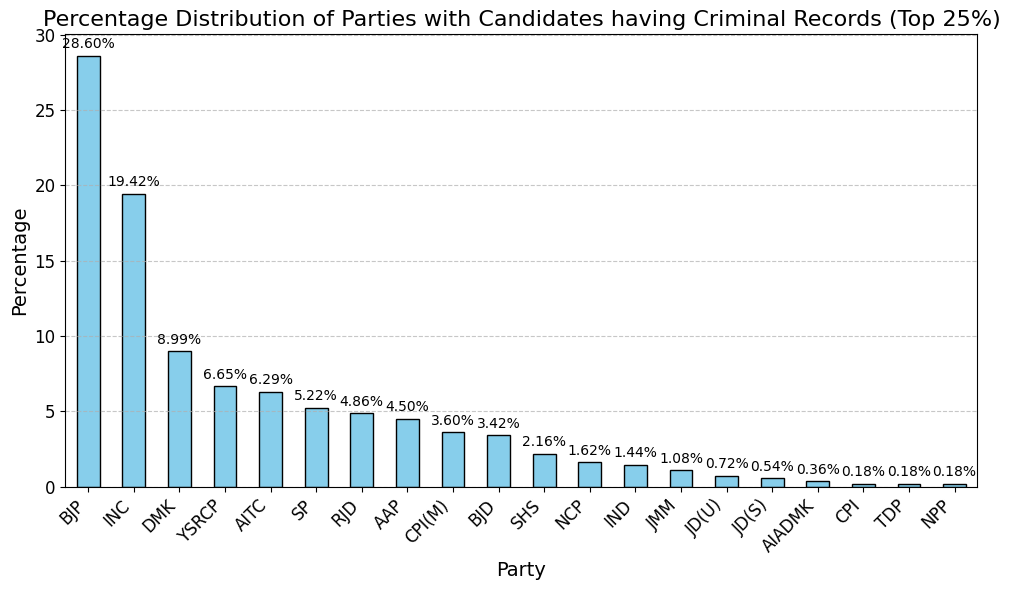

In [100]:
# Criminal case threshold for top 25% of candidates
criminal_threshold = df['Criminal Case'].quantile(0.75)

# Filter out candidates
criminal_records_top25 = df[df['Criminal Case'] >= criminal_threshold]

# Candidates from each party with criminal records
party_criminal_counts = criminal_records_top25['Party'].value_counts()

# percentage distribution
party_criminal_percentage = (party_criminal_counts / len(criminal_records_top25)) * 100

# Plotting
plt.figure(figsize=(10, 6))
party_criminal_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage Distribution of Parties with Candidates having Criminal Records (Top 25%)', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(party_criminal_percentage):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Plotting the percentage distribution of parties with the most wealthy candidates:

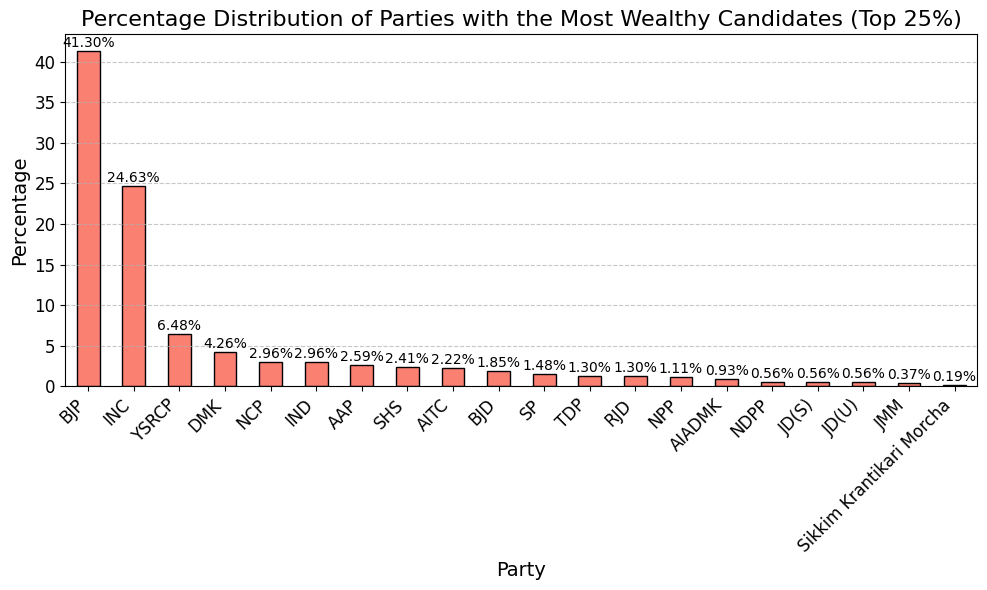

In [101]:
# Total assets threshold for top 25% of candidates
assets_threshold = df['Total Assets'].quantile(0.75)

# Filtering
wealthy_candidates_top25 = df[df['Total Assets'] >= assets_threshold]

# Total assets above the threshold
party_wealthy_counts = wealthy_candidates_top25['Party'].value_counts()

# percentage distribution
party_wealthy_percentage = (party_wealthy_counts / len(wealthy_candidates_top25)) * 100

# Plotting
plt.figure(figsize=(10, 6))
party_wealthy_percentage.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Percentage Distribution of Parties with the Most Wealthy Candidates (Top 25%)', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(party_wealthy_percentage):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Scatter plot of Total Assets vs. Education Level:

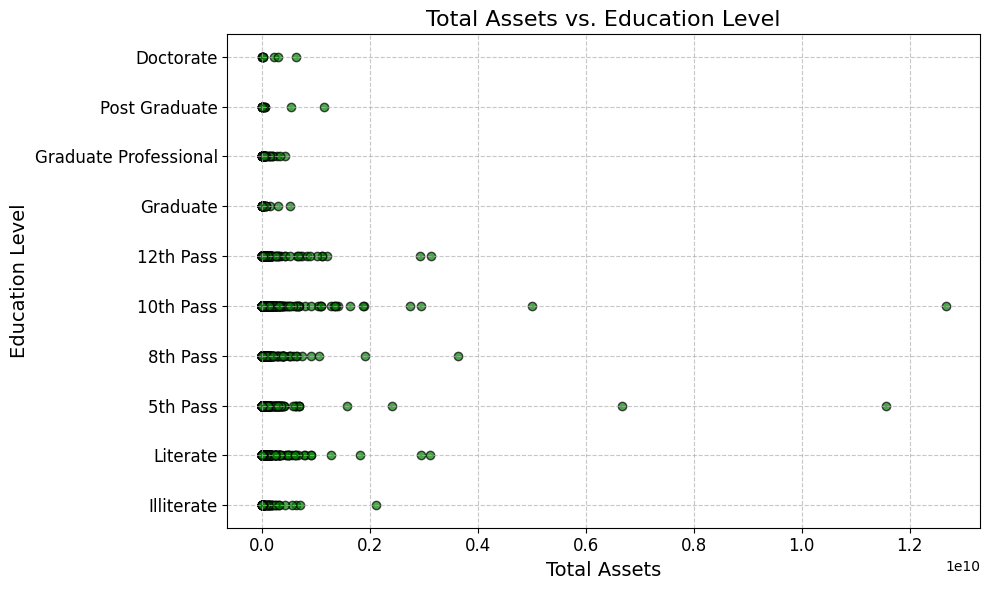

In [102]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Assets'], df['Education'], color='green', edgecolor='black', alpha=0.7)
plt.title('Total Assets vs. Education Level', fontsize=16)
plt.xlabel('Total Assets', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.yticks(list(education_map.values()), list(education_map.keys()), fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pie chart of Party Distribution: 

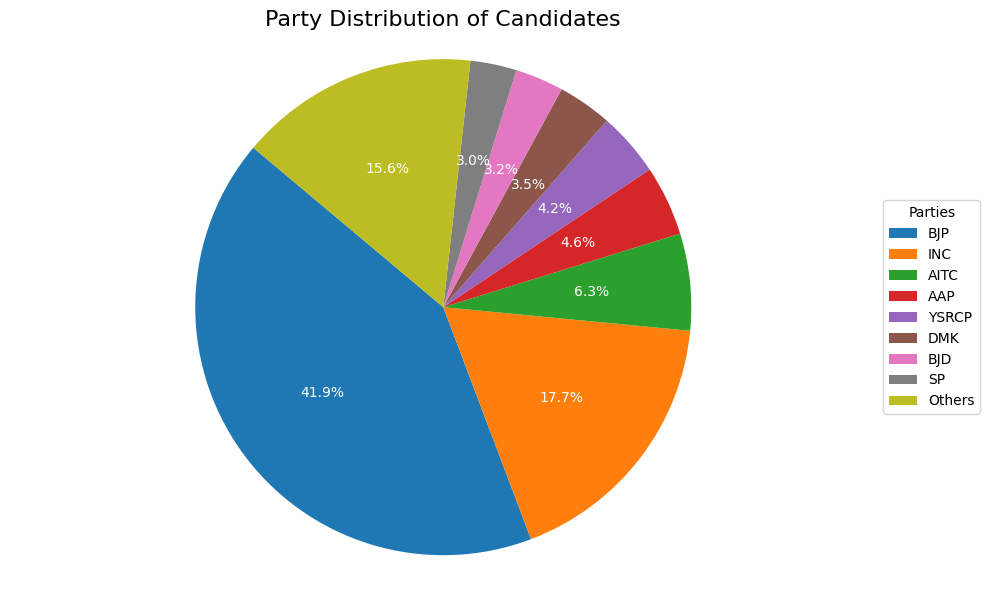

In [103]:
# Candidates from each party
party_distribution = df['Party'].value_counts()

# Define a threshold for small party values
threshold = 50

# Group parties with counts less than the threshold into 'Others'
small_parties = party_distribution[party_distribution < threshold]
party_distribution['Others'] = small_parties.sum()
party_distribution.drop(small_parties.index, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(party_distribution, autopct='%1.1f%%', startangle=140)
plt.title('Party Distribution of Candidates', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.legend(party_distribution.index, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

Plotting percentage of candidates above 12th Pass for each state:

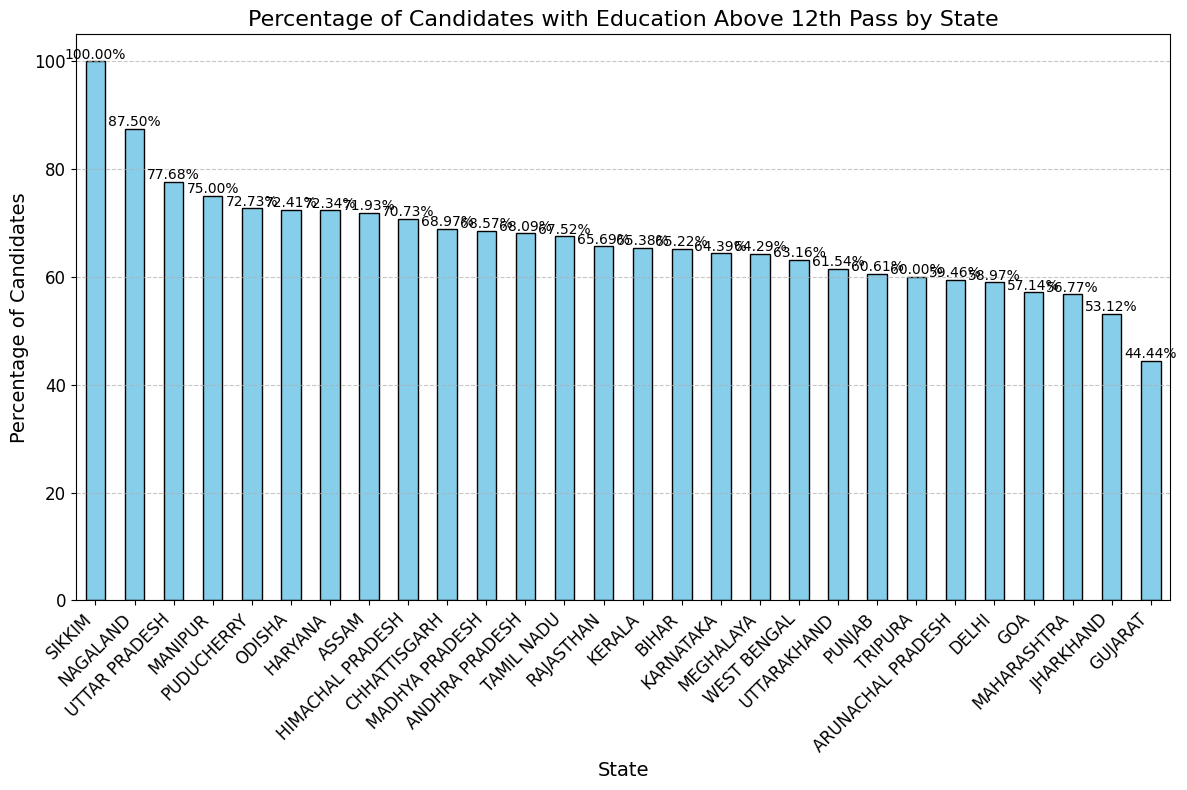

In [104]:
# Filtering candidates
above_12th_pass = df[df['Education'].isin(['Graduate', 'Graduate Professional', 'Post Graduate', 'Doctorate'])]

# Counting
state_candidate_counts = above_12th_pass.groupby('state').size()
state_total_candidates = df['state'].value_counts()

# Percentage of candidates above 12th pass for each state
state_percentage_above_12th = (state_candidate_counts / state_total_candidates) * 100

# Sort the states by percentage in descending order
state_percentage_above_12th_sorted = state_percentage_above_12th.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
state_percentage_above_12th_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Candidates with Education Above 12th Pass by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Candidates', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of each bar
for i, v in enumerate(state_percentage_above_12th_sorted):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()